In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import pynapple as nap


In [2]:
data = pd.read_csv("/Users/tazakkaibrahimadie/Documents/Mine/UALBERTA/Research with Dr. Munz/Caiman Analysis Pipeline/good!/Second full trial 2.0.csv", 
                   header=None,
                   na_values=[' '])

df = pd.DataFrame(data)
df = df.drop(columns=[0])

df.head()

,1,2,3,4,5,6
0,5.737,4.416,5.530,5.257,4.563,5.533
1,5.046,4.264,5.723,5.343,3.850,5.804
2,5.120,4.452,5.724,5.166,5.092,5.619
3,5.421,4.441,5.859,5.227,4.961,5.634
4,4.734,4.080,5.899,5.199,4.954,5.586


In [3]:
df_rolling = pd.DataFrame(df, columns=df.columns).rolling(window=3).mean()

In [4]:
corr_mat = df_rolling.corr().round(3)
corr_mat

,1,2,3,4,5,6
1,1.000,0.216,0.397,0.346,0.404,0.429
2,0.216,1.000,0.499,0.704,0.615,0.615
3,0.397,0.499,1.000,0.751,0.730,0.851
4,0.346,0.704,0.751,1.000,0.865,0.896
5,0.404,0.615,0.730,0.865,1.000,0.856
6,0.429,0.615,0.851,0.896,0.856,1.000


Text(0.5, 1.0, 'Correlation Matrix of all 6 ROIs')

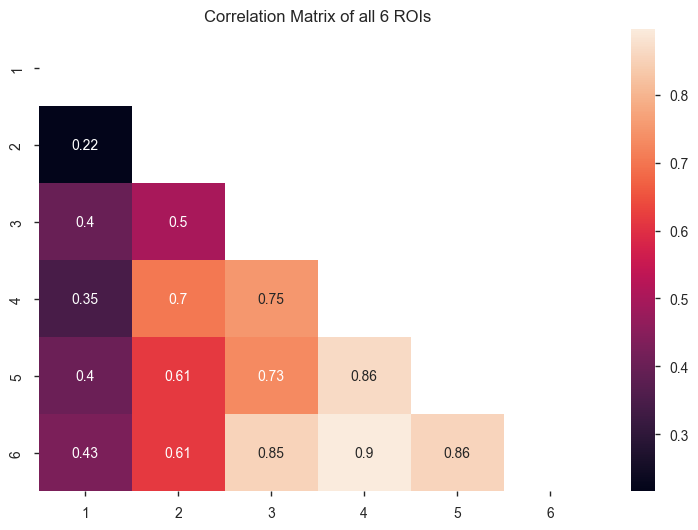

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

mask = np.triu(np.ones_like(corr_mat, dtype=bool))

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_mat, mask=mask, annot=True, cbar = True)
plt.title("Correlation Matrix of all 6 ROIs")

## *Violin Plots of the correlation matrix*

Text(0.5, 1.0, 'violin plots of corr mat')

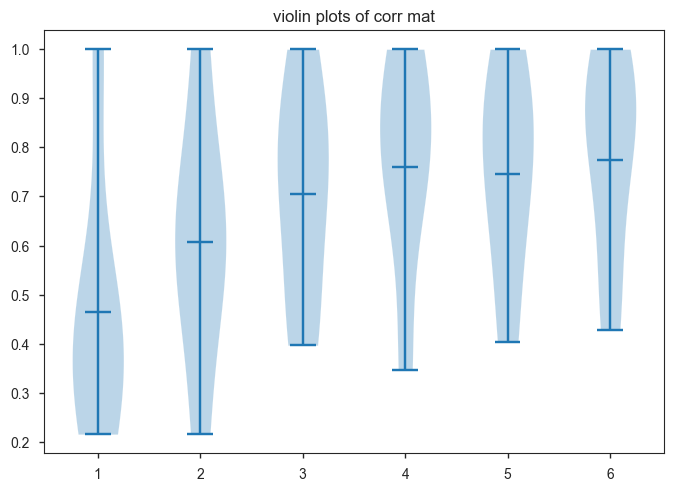

In [9]:
plt.violinplot(corr_mat, showmeans=True)
plt.title("violin plots of corr mat")

Text(0.5, 0.98, 'raw calcium traces reference')

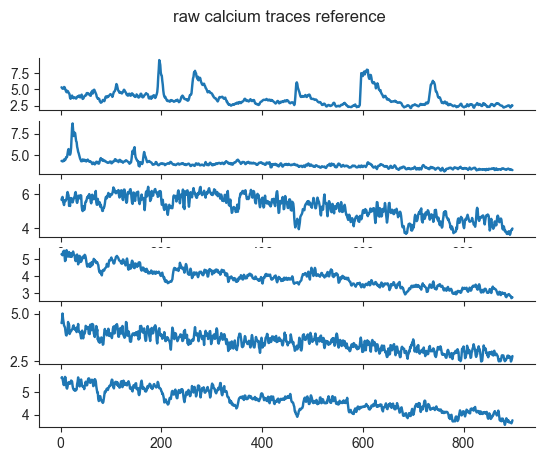

In [7]:
fig, axs = plt.subplots(6,1)
plt.style.use('seaborn-v0_8-notebook')
sns.set_style("ticks")
sns.despine()

plt.sca(axs[0])
plt.plot(df_rolling[1])

plt.sca(axs[1])
plt.plot(df_rolling[2])

plt.sca(axs[2])
plt.plot(df_rolling[3])

plt.sca(axs[3])
plt.plot(df_rolling[4])

plt.sca(axs[4])
plt.plot(df_rolling[5])

plt.sca(axs[5])
plt.plot(df_rolling[6])

plt.suptitle("raw calcium traces reference")